<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Visualizations-to-choose-our-model:-ACF-(AR)-&amp;-PACF-(MA)" data-toc-modified-id="Visualizations-to-choose-our-model:-ACF-(AR)-&amp;-PACF-(MA)-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Visualizations to choose our model: ACF (AR) &amp; PACF (MA)</a></span></li></ul></li><li><span><a href="#Predictive-models" data-toc-modified-id="Predictive-models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive models</a></span></li><li><span><a href="#FORECASTING:-temperatures" data-toc-modified-id="FORECASTING:-temperatures-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FORECASTING: temperatures</a></span><ul class="toc-item"><li><span><a href="#Reading-the-data" data-toc-modified-id="Reading-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reading the data</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#ARIMA-model" data-toc-modified-id="ARIMA-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ARIMA model</a></span></li><li><span><a href="#Into-the-future:-forecasting-🔮" data-toc-modified-id="Into-the-future:-forecasting-🔮-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Into the future: forecasting 🔮</a></span></li></ul></li><li><span><a href="#Further-Resources" data-toc-modified-id="Further-Resources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Further Resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression #python3 -m pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

In [2]:
def import_and_clean ():
    df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")
    df.index = pd.to_datetime(df.date)
    infer_ = pd.infer_freq(df.index)
    return df

In [3]:
df = import_and_clean ()
df

,date,value
date,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869
...,...,...
2008-02-01,2008-02-01,21.654285
2008-03-01,2008-03-01,18.264945
2008-04-01,2008-04-01,23.107677


### Visualizations to choose our model: ACF (AR) & PACF (MA)

[ACF & PCF](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c)

`plot_acf(df.Series)`

- What is the X axis
- What is the Y axis? 
- What is the first line?
- What does the line corresponging to x=12 correspond to?

In [4]:
# x = number of lags, months of lag; 
# y = how much it is correlated

In [5]:
def plotting_acf (df):
    plot_acf(df.value);
    plt.title("Autocorrelation of Diabetes drugs: value of correlation across different # of lags", size=20)
    plt.axvline(x=12, c="y", linestyle="--", label="one year")
    plt.axvline(x=16, c="r", linestyle="--")
    plt.legend();

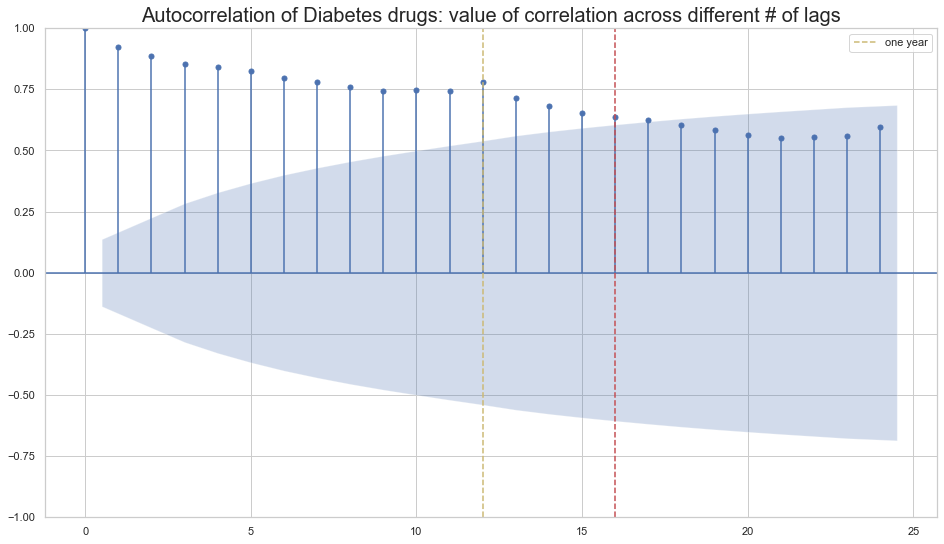

In [6]:
plotting_acf (df)

In [7]:
from statsmodels.tsa.stattools import pacf

`plot_acf(df.Series)`

- What is the X axis
- What is the Y axis? 

- What is the first line?
- What does the line corresponging to x=12 correspond to?

In [8]:
def plotting_partial (df):
    plot_pacf(df.value)
    plt.title("Partial autocorrelation of Diabetes drugs: value of correlation across different # of lags", size=20)
    plt.axvline(x=2, c="r", linestyle="--", label="lags before entering shaded area")
    plt.axvline(x=4, c="r", linestyle="--", label="lags before entering shaded area");

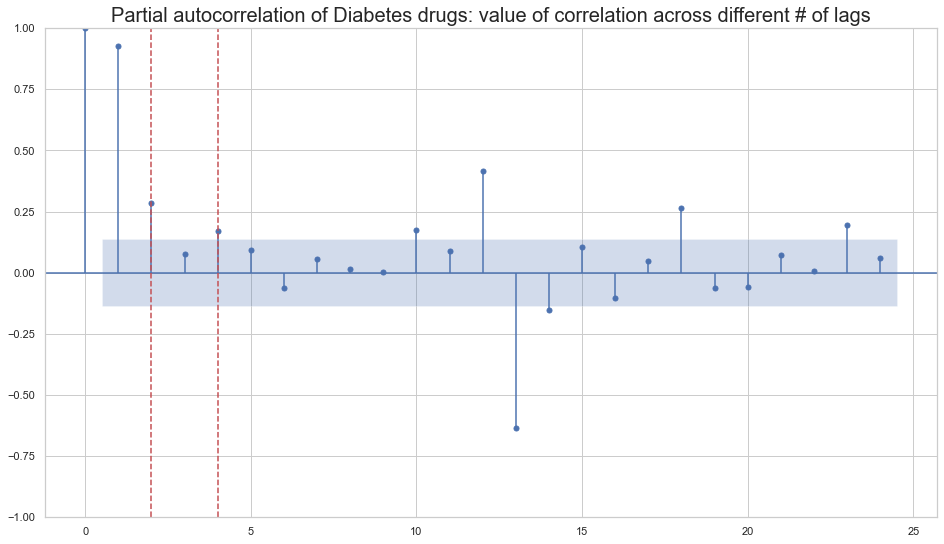

In [9]:
plotting_partial (df)

In [10]:
# Stationary
    # MA 
    # AR

# ARMA


# Non-stationary
    # AR I MA

## Predictive models

"All models are wrong, but some are useful" - George E. P. Box, statistician

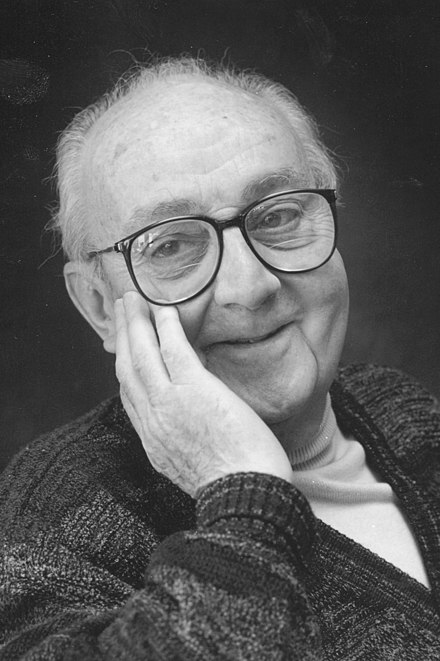

- **Scenario 1**
    - ACF: gradually decrease
    - PACF: sharp drop
    
    Model: AR (dependant on previous values)
    
- **Scenario 2**
    - ACF: sharp drop
    - PACF: gradual decrease
    
    Model: MA (dependant on errors)

- **Scenario 3**
    - ACF: gradual decrease
    - PACF: gradual decrease
    
    Model: ARMA (combination)


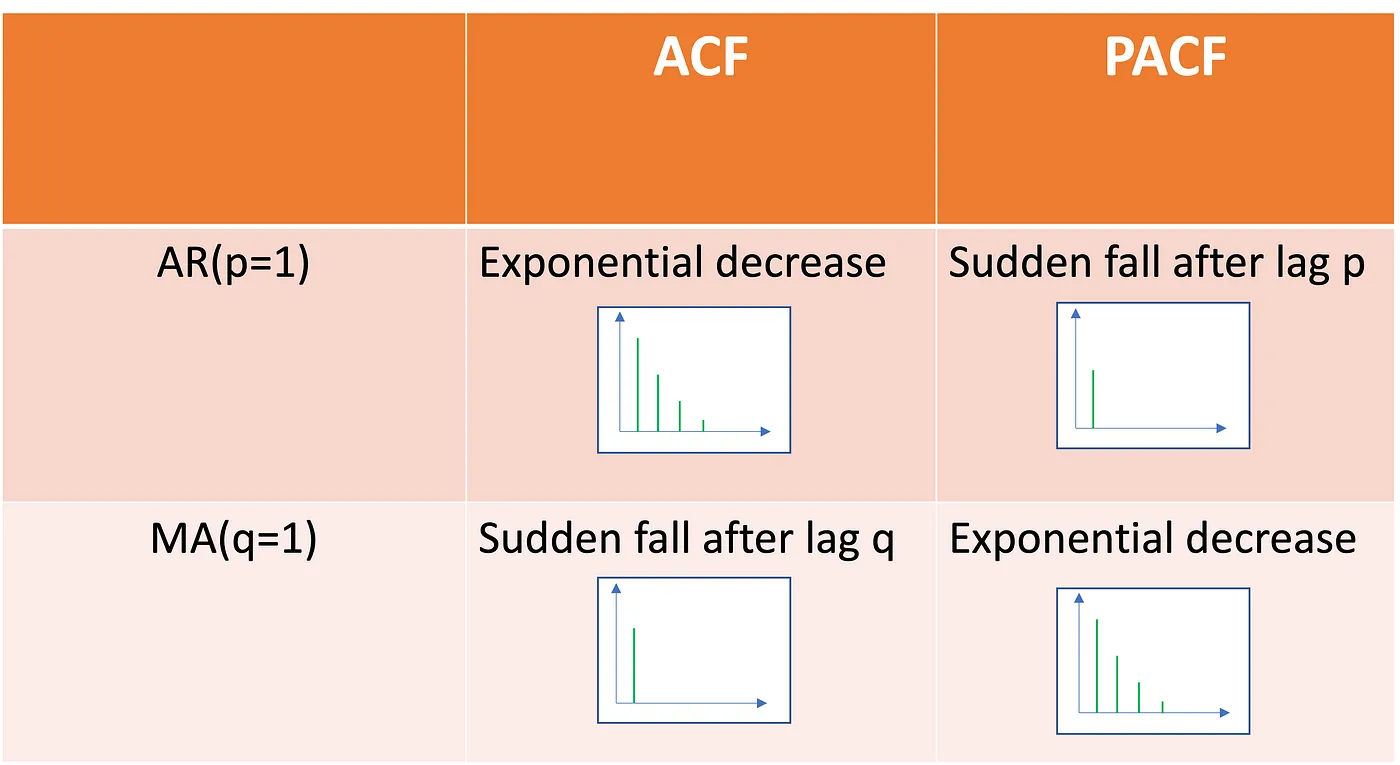

-  **AR Model (p)**: AR stands for AutoRegressive. It is the simplest model. Basically Autoregressive models predict the current value of our time series based on past values. For example, we would use the autoregressive model in series of the type where "if we know today's prices, we can make an approximate prediction of tomorrow's prices". This has to do with autocorrelation. The AR model relies only on past period values to predict current period values. They do not work well if the data is not stationary. <br>

- **MA Model (q)**: Moving average models predict the current value of our time series based on past residuals. A simple order moving average model, of order one, would only consider the value of the residual in the previous period.<br>

- **ARMA Models (p, q)**: It is the combination of both AR and MA models, with which an ARMA model would have two orders `(p,q)`, where `p` is the order of the **autoregressive** part and `q` is the order of the **moving average** part<br>

- **ARIMA Model (p, d, q)**: It is an ARMA model applied to the result of integrating the time series a certain number of times, in the order of integration. That is, an ARIMA model of order (p,d,q) consists of integrating the original series d times, and then fitting an ARMA(p,q) model to that integrated series. The objective of the integration is to obtain a stationary series, since the ARMA models perform worse for non-stationary series.<br>

- **SARMA AND SARIMA Models (P, D, R)**: Let's remember that seasonality occurs when certain patterns appear periodically, for example, something that is repeated every year. Therefore, in this case, a simple AR autoregressive model will not describe the data well. Why? Because it only considers the value of the previous period to estimate the current period.<br>

- **MAX models**: MAX models are models that consider exogenous information to explain the endogenous variable (the series we are studying). We are going to have MAX versions of all the models: ARMAX, ARIMAX, SARMAX and SARIMAX.

- Facebook Prophet: https://facebook.github.io/prophet/docs/quick_start.html

- `(p, q, d)`
    - `p`: The number of **lag observations** included in model. How far back I go for my new observation
    - `q`: Size of **moving avarege window** - How big your season is
    - `d`: degree of differencing - if your data is seasonal - we make it stationary : mean does not change
            `diff() 1 diff()diff() 2 diff()diff()diff() 3` 

[diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)

`(AR, I, MA)`

|   Params| (p,    | d,   | q)     |   |
|---|------|-----|-------|---|
|   Acronym| (AR,   | I,  | MA )   |   |
|   Meaning| (lags | int, | error) |   |
|   Visualization| (PACF | -   | ACF )  |   |

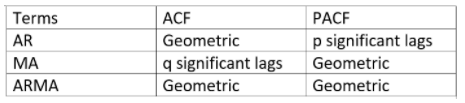

`Y = (Auto-Regressive Parameters) + (Moving Average Parameters)`

In [ ]:
# Base is Autoregression & Moving average
# The models grow in complexity but they have the same base
# They take parameters: p, q, d
# There's criteria to choose one or the other: trends & seasonality
# Mostly you'll be working with ARMA/ARIMA

## FORECASTING: temperatures

[The docs](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)

In [11]:
from statsmodels.tsa.arima.model import ARIMA

from random import random

# 1. Data
# 2. Fit/train:
    # finding the expression that draws that line
       # maximize: the points that it can describe
    
# 3. Predict

### Reading the data

In [12]:
df = pd.read_csv('../datasets/weather_data.csv')
df.head(3)

,month,temperature,humidity,rainfall
84,2016-01-01,29.0,79,167.1
85,2016-02-01,27.7,84,289.6
86,2016-03-01,28.7,82,251.6


In [13]:
df.index = pd.DatetimeIndex(df["month"])

In [14]:
df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='month', freq=None)

### Seasonality

Decompose the time series

- Seasons
- General trend
- The rest

In [ ]:
# error
    # def houts_grades (10):
        # return 10 * 0.456
        
    # 4.56
    # 4.7
    
    # residual: 4.56 - 4.7 

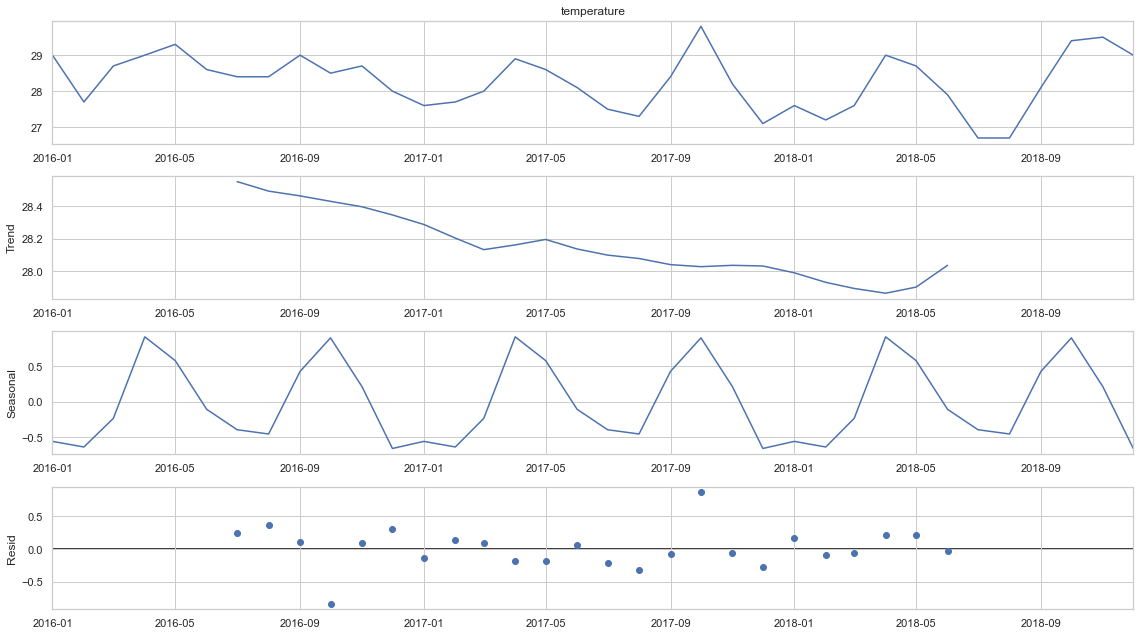

In [15]:
decomp = sm.tsa.seasonal_decompose(df["temperature"], model="additive")
decomp.plot();

### ARIMA model

- **AR**: Autoregressive model
- **I**: Integrated - we dont use the values we use the diference
- **MA**: Moving avarege model

- `(p, d, q)`
    - `p`: The number of lag observations included in model
    - `d`: degree of differencing - if your data is seasonal - we make it stationary : mean does not change
        `diff() 1 diff()diff() 2 diff()diff()diff() 3`
    - `q`: Size of moving avarege window - how big is your season


- Visualization
   - Autocorrelation `acf` plot
   - Partial autocorrelation: `pacf` plot


`acf`

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>x</mi>
    <mi>t</mi>
  </msub>
  <mo>=</mo>
  <mi>&#x3B4;</mi>
  <mo>+</mo>
  <msub>
    <mi>&#x3D5;</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mi>t</mi>
  </msub>
</math>

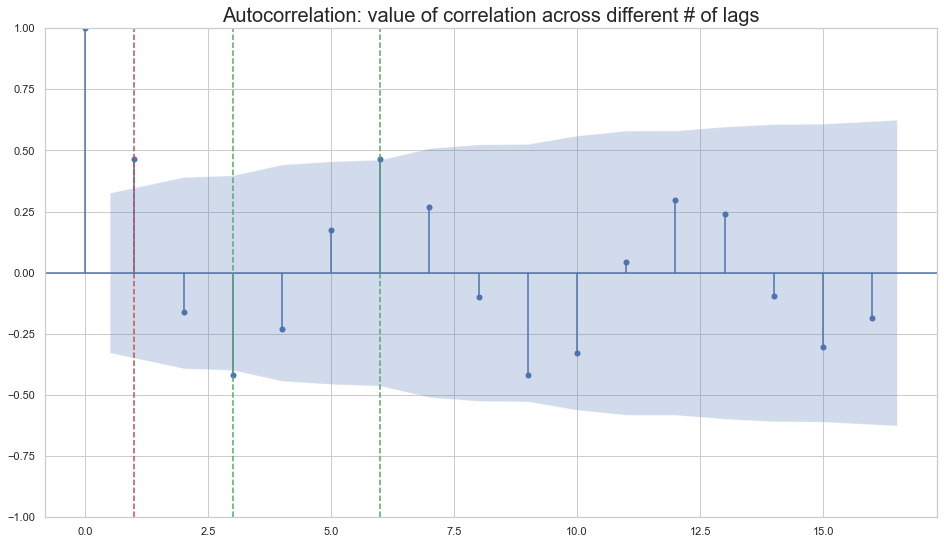

In [16]:
plot_acf(df.temperature);
plt.title("Autocorrelation: value of correlation across different # of lags", size=20)
plt.axvline(x=1, c="r", linestyle="--")
plt.axvline(x=3, c="g", linestyle="--")
plt.axvline(x=6, c="g", linestyle="--");

`pacf: 𝑦𝑡,1=𝜙1,1𝑦𝑡−1+𝜖𝑡`

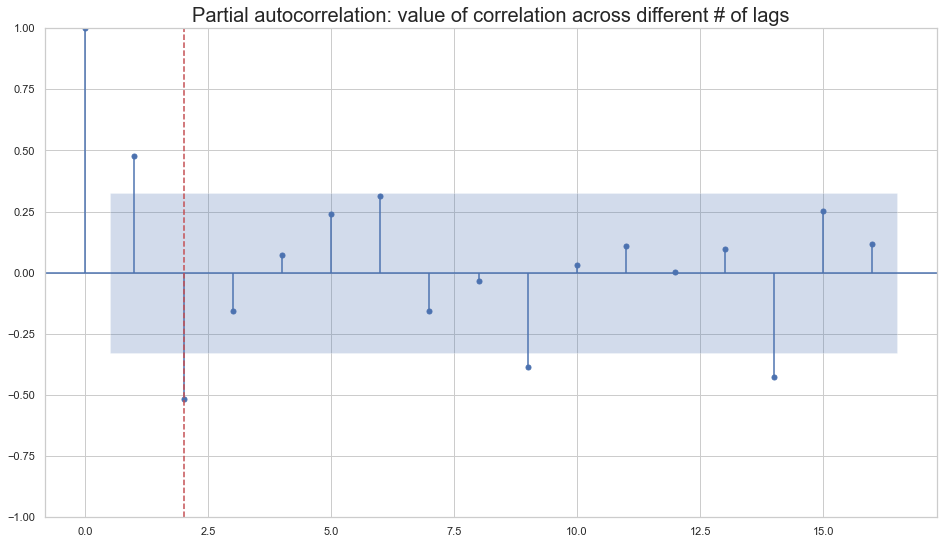

In [49]:
plot_pacf(df.temperature)
plt.title("Partial autocorrelation: value of correlation across different # of lags", size=20)
plt.axvline(x=2, c="r", linestyle="--");

In [ ]:
# AR (p) # lags (1, 3, 6)
# MA (q) # size (2)
# I

- **Scenario 1**
    - ACF: gradually decrease
    - PACF: sharp drop
    
    Model: AR (dependant on previous values)
    
- **Scenario 2**
    - ACF: sharp drop
    - PACF: gradual decrease
    
    Model: MA (dependant on errors)

- **Scenario 3**
    - ACF: gradual decrease
    - PACF: gradual decrease


`2. fit the model`

In [ ]:
# we forgot to check if it's stationary
# but we're passing an ARMA (ARIMA with the I set to zero)

In [98]:
model = ARIMA(df["temperature"], order = (6, 1, 2), freq="MS").fit()

In [99]:
# model
# model.fit -> defining the stereotype / on the dats
# model.predict -> guess
# metrics: guess vs actual data

In [100]:
model.mae # Mean Average Error, MAE -> on average, how wrong is the model?

1.2738487850663163

In [101]:
# on average, it'll be wrong by .44
# 0.44 C on average that the model will get wrong

In [102]:
# The model will be predicting with this error: 0.44 # degrees
# The model will be predicting with this error: 5.44 # 5 degrees wrong
# The model will be predicting with this error: 10.44 # 10 degrees wrong

In [103]:
model.mse # mean squared error

23.673069324194227

In [104]:
model.summary() # p_value
                # p_value -> hoW likely it is that a given coefficient is actually predicting our dependant variable
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                   36
Model:                 ARIMA(6, 1, 2)   Log Likelihood                 -27.554
Date:                Tue, 20 Feb 2024   AIC                             73.108
Time:                        13:15:07   BIC                             87.106
Sample:                    01-01-2016   HQIC                            77.940
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7526      1.640     -0.459      0.646      -3.967       2.462
ar.L2         -0.6497      1.340     -0.485      0.628      -3.276       1.976
ar.L3         -0.8579      1.271     -0.675      0.500      -3.348       1.632
ar.L4         -0.7108      1.355     -0.524      0.600      -3.367       1.946
ar.L5         -0.6218      1.270     -0.490      0.624      -3.110       1.867
ar.L6         -0.0515      1.083     -0.048      0.962      -2.175       2.072
ma.L1          0.3784      1.609      0.235      0.814      -2.776       3.533
ma.L2         -0.2092      0.799     -0.262      0.793      -1.775       1.357
sigma2         0.2525      0.110      2.298      0.022       0.037       0.468
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.12
Prob(Q):                              0.85   Prob(JB):                         0.35
Heteroskedasticity (H):               1.01   Skew:                             0.15
Prob(H) (two-sided):                  0.98   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Into the future: forecasting 🔮

`3. predict`

In [105]:
# SHAP DROP IN Both vs gradual decrease

In [106]:
# 1. FIT: based these value, come up with an equation
# 2. PREDICT: generate the values based on whatever I ask you
    # def grade_based_on_hours (hrs):
        # return x * 657
    
    # date -> temperature
    
# 3. ERROR: predicting on what we know: ERROR


# ----------

# 3. predicting on what we don't know: ?🤷‍♂️
    # this is my guess -> 0.44 average

In [107]:
# model: arma

In [108]:
df["forecasting_arima"] = model.predict(start=len(df["temperature"])-20, end=len(df["temperature"])-1)

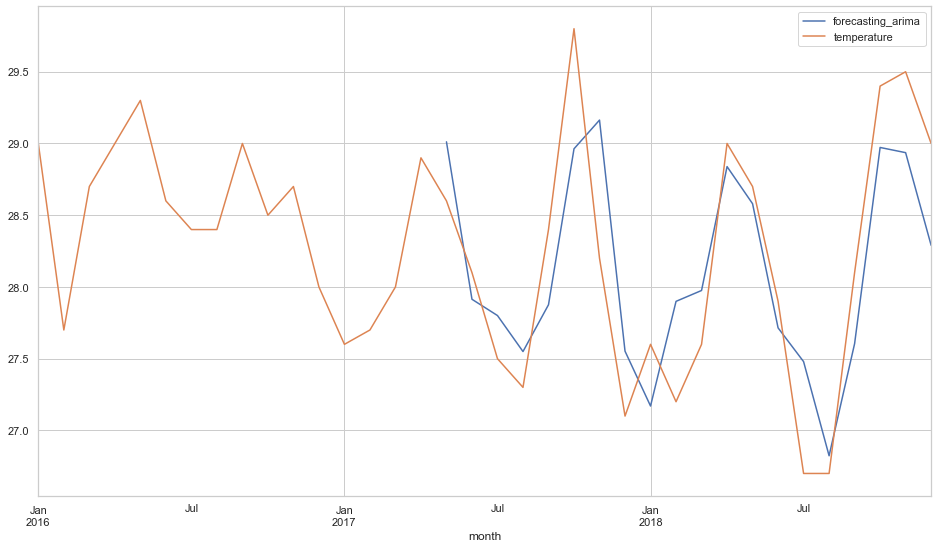

In [109]:
df[["forecasting_arima", "temperature"]].plot();

`creating new date-data points`

In [110]:
start = datetime.datetime.strptime('2019-01-01', '%Y-%m-%d')
date_list = [start+relativedelta(month=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns=df.columns)

`concatenating them to the original df`

In [111]:
forecast_df = pd.concat([df, future], axis=0)
forecast_df

,month,temperature,humidity,rainfall,forecasting_arima
2016-01-01,2016-01-01,29.0,79,167.1,NaN
2016-02-01,2016-02-01,27.7,84,289.6,NaN
2016-03-01,2016-03-01,28.7,82,251.6,NaN
2016-04-01,2016-04-01,29.0,80,235.1,NaN
2016-05-01,2016-05-01,29.3,79,392.8,NaN
2016-06-01,2016-06-01,28.6,80,174.0,NaN
2016-07-01,2016-07-01,28.4,80,258.4,NaN
2016-08-01,2016-08-01,28.4,75,100.7,NaN
2016-09-01,2016-09-01,29.0,74,120.8,NaN
2016-10-01,2016-10-01,28.5,79,501.7,NaN


`plotting the past and the future`

In [112]:
# 1. Fit
# 2. Predict

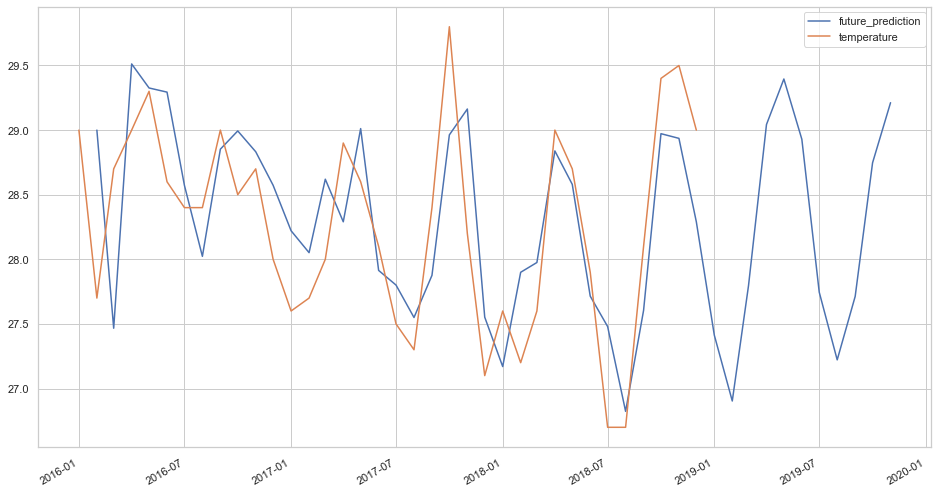

In [113]:
forecast_df["future_prediction"] = model.predict(start=1, end=47)
forecast_df[["future_prediction", "temperature"]].plot();

# RECAP



In [104]:
# Auto-correlation
# Lags

# MODELS
    # All models are wrong, but some are useful
    # MA: moving average
    # AR: auto-regression
    # ARIMA: both with integrales
    
    # MAE: on average, how wrong you're gonna be
    # low error: good model
    # high error: bad model
    
    # what's the threshold? no threshold for the error: MAE 0.44C, MAE 0.45C,

[Prophet](https://medium.com/mlearning-ai/time-series-forecasting-445e2dde194c)

[Pycaret](https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63)

## Further Resources
- [Pycaret](https://pycaret.org/)
- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)
- [Auto ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)
- [Detailed step by step recognition of model](https://people.duke.edu/~rnau/arimrule.htm)
- [Detailed step by step of time series exploration](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- [Modeling with ARIMA](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)
